In [1]:
import numpy as np
import scipy as sp
import distances
import gr_kmeans
import gr_lbg
import heatmap
import plots
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from load_ip_data import load_ip_data
from mnist import load_mnist_data
from subspaces import make_subspaces

In [2]:
data, labels = load_mnist_data(2, sample_size = 1000)
print(data.shape)

Sample number for digit 2 reduced to 784
(784, 5958)


In [4]:
sub, lbls = make_subspaces(data, labels, dim=5)
print(sub[0].shape)
print(len(sub))

(784, 5)
156


In [4]:
D = distances.chordal_distance(sub, sub)
embed = distances.mds(D)

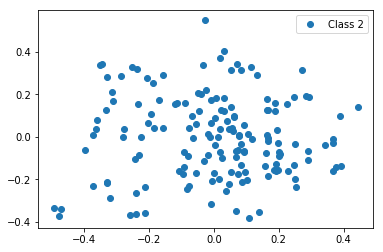

In [5]:
plt.figure()
for i in np.unique(lbls):
    idx = np.where(lbls == i)[0]
    plt.plot(embed[idx, 0], embed[idx, 1], 'o', label='Class %i' % i)
plt.legend()
plt.show()

Iteration 1 cluster distortion: 3.14072325
Iteration 2 cluster distortion: 3.14072325
LBG terminated after 2 iterations 



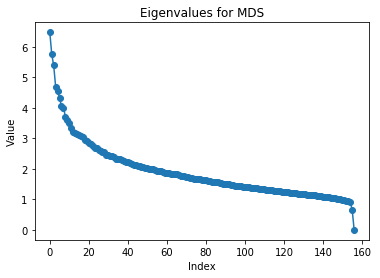

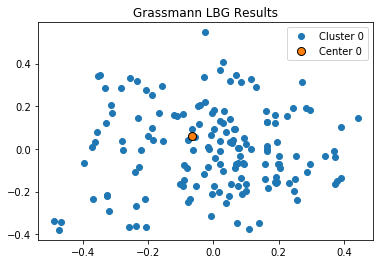

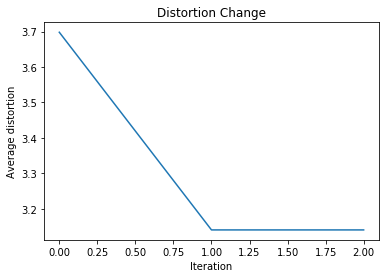

In [6]:
lbg = gr_lbg.gr_lbg()
lbg_centers, lbg_labels = lbg.fit(sub, true_labels=lbls, center_count=1, plot_results=True, eigplot=True,
                                 show_cluster_data=False)

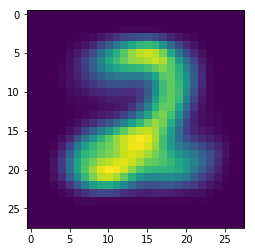

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[0][:,0].reshape((28,28)))

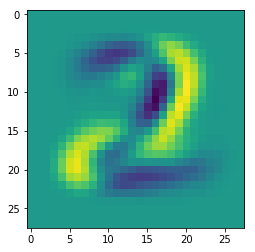

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[0][:,1].reshape((28,28)))

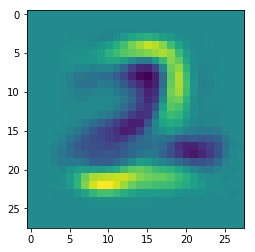

In [9]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[0][:,2].reshape((28,28)))

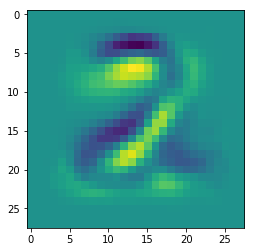

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[0][:,3].reshape((28,28)))

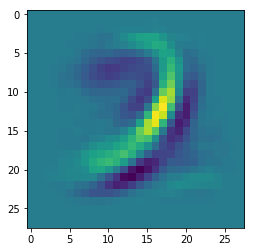

In [11]:
fig, ax = plt.subplots()
im = ax.imshow(lbg_centers[0][:,4].reshape((28,28)))

Epoch 1 cluster distortion: 3.24084996
Kmeans terminated after 1 iterations 



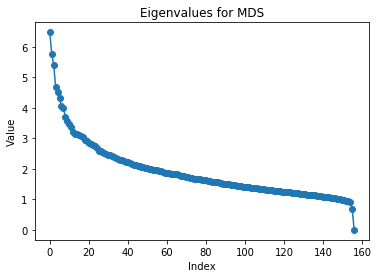

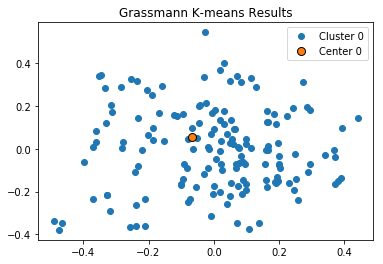

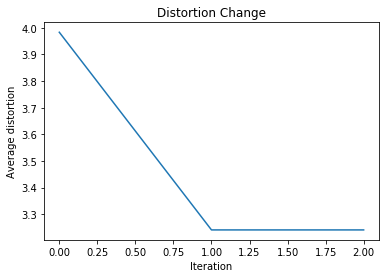

In [12]:
kmeans = gr_kmeans.gr_kmeans()
kmeans_centers, kmeans_labels = kmeans.fit(sub, true_labels=lbls, center_count=1, plot_results=True, eigplot=True,
                                          show_cluster_data=False)

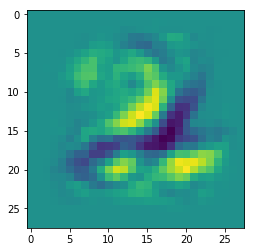

In [13]:
fig, ax = plt.subplots()
im = ax.imshow(kmeans_centers[0][:,0].reshape((28,28)))

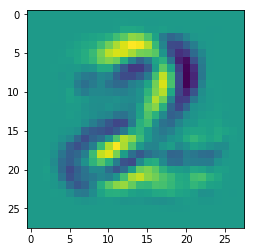

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(kmeans_centers[0][:,1].reshape((28,28)))

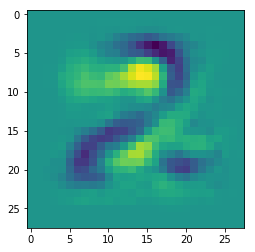

In [15]:
fig, ax = plt.subplots()
im = ax.imshow(kmeans_centers[0][:,2].reshape((28,28)))

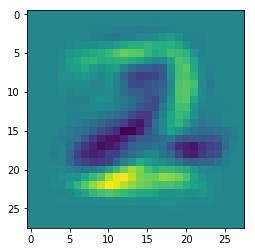

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(kmeans_centers[0][:,3].reshape((28,28)))

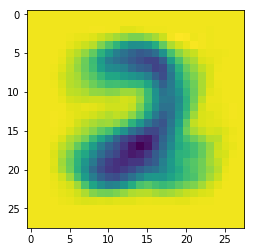

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(kmeans_centers[0][:,4].reshape((28,28)))

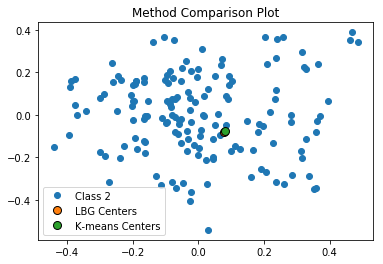

In [18]:
plots.method_comparison_plot(sub, lbls, kmeans_centers, lbg_centers)

In [19]:
cosines = np.dot(lbg_centers[0].T, kmeans_centers[0])
angles = np.arccos(cosines)
print(angles)

[[1.54504426 1.63687715 1.73613982 1.57916459 2.95927201]
 [2.24654507 2.38211282 1.80371891 1.6700458  1.49977083]
 [1.75870555 1.44662104 1.84975179 0.47182418 1.54561664]
 [1.57245974 1.8753576  0.7549404  1.38351273 1.6687049 ]
 [1.63823654 1.38394206 1.90096706 1.89968769 1.52375336]]
